# Lineární regrese

V tomto notebooku se budeme zabývat využitím lineární regrese k predikci

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)

## Načtení dat

Využijeme data ze serveru Kaggle o cenách domů v oblasti Bostonu v USA [více info zde](https://www.kaggle.com/c/boston-housing).

Data jsou již vyčištěná. Proměnná, kterou chceme predikovat je `medv`.

In [3]:
df = pd.read_csv('boston.csv')
print('Shape', df.shape)
df.head()

Shape (333, 15)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Příprava trénovací a testovací množiny

Využijeme [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ze `scikit-learn`.

In [4]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(df.drop(columns = ['ID', 'medv']), df['medv'], test_size=0.25, random_state=42)
print('Train X shape', X.shape)
print('Test X shape', X_test.shape)

Train X shape (249, 13)
Test X shape (84, 13)


## Task 1 - proveďte metodu nejmenších čtverců ručně

Používejte pouze maticové operace v [numpy.linalg](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html).

* Vypočtěte odhad $\hat{\boldsymbol w}_{OLS} = (\mathbf{X}^T \mathbf X)^{-1} \mathbf X^T \boldsymbol Y$ a vypište jednotlivé koeficienty.
* Spočtěte hodnotu $\text{RSS}(\hat{\boldsymbol w}_{OLS}) = \lVert \boldsymbol Y - \mathbf X \boldsymbol w \rVert^2$.
* Pro testovací data proveďte predikce $\hat Y_i$ a porovnejte je se skutečnými hodnotami $Y_i$.
Jako míru porovnání použijte RMSE - root mean squared error definovanou pomocí vztahu $\text{RMSE} = \sqrt{\sum_{i}(Y_i - \hat Y_i)^2}$. Můžete použít implementaci [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
* Nakreslete scatter plot hodnot $Y_i$ a $\hat Y_i$ pro testovací množinu.


In [5]:
# Your code here
from sklearn.metrics import mean_squared_error


intercept = np.ones((X.shape[0],1))
Xi = np.append(intercept,X,axis=1)

intercept = np.ones((X_test.shape[0],1))
Xi_test = np.append(intercept,X_test,axis=1)

XX = np.matrix(Xi)
YY = np.matrix(Y).T

print(XX.shape)
print(YY.shape)

Xi_test = np.matrix(Xi_test)
Yi_test = np.matrix(Y_test).T

print(Xi_test.shape)
print(Yi_test.shape)
#np.inv(np.matmul(X.T, X))
w= (XX.T*XX).I * XX.T * YY
print(w.shape)

RSS = np.linalg.norm( YY-XX*w)**2
print('RSS',RSS)

RSS = np.linalg.norm( Yi_test-Xi_test*w)**2
print('RSS',RSS)

print('RMSE', np.sqrt( mean_squared_error(np.array(Yi_test), np.array(Xi_test*w)) ))

(249, 14)
(249, 1)
(84, 14)
(84, 1)
(14, 1)
RSS 5649.69059873862
RSS 1934.9830174467254
RMSE 4.799532488947337


## Task 2 - zopakujte metodu nejmenších čtverců s využitím scikit-learn

* Zopakujte postup z předchozího bodu s využitím třídy [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) ze `scikit-learn`.
* Porovnejte výsledky s předchozím manuálním přístupem.

RMSE 4.799532488947345


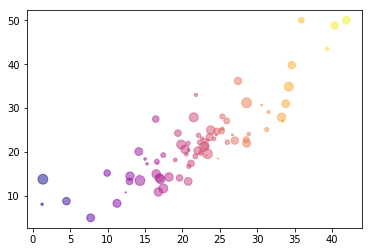

In [6]:
# Your code here
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression().fit(X, Y)
odhad = reg.predict(X_test)
print('RMSE', np.sqrt( mean_squared_error(np.array(Y_test), odhad ) ))
area = (10* np.random.rand(50))**2
plt.scatter(odhad, Y_test,cmap="plasma",c=odhad,s=area,alpha=0.5)

## Task 3 - proveďte metodu nejmenších čtverců pomocí gradientního sestupu

* Ručně implementujte gradientní sestup pro hledání $\boldsymbol w$ minimalizujícího $\text{RSS}(\boldsymbol w)$. Gradient je: $\nabla\text{RSS}(\boldsymbol{w}) = -2 \mathbf{X}^T ( \boldsymbol Y - \mathbf X \boldsymbol{w})$.
* Výsledný odhad $\hat{\boldsymbol w}$ porovnejte s $\hat{\boldsymbol w}_{OLS}$ získaným v předchozím bodě.

In [7]:
# Your code here

XX = np.matrix(X)
YY = np.matrix(Y).T
ww = np.ones((XX.shape[1],1))
print(XX.shape)
print(YY.shape)
print(w.shape)

for i in range(10):
    ww =ww - 0.1*(-2*XX.T*(YY-XX*ww))
print(ww-ww[-1:])

(249, 13)
(249, 1)
(14, 1)
[[-2.24235e+70]
 [-6.98909e+69]
 [-3.00010e+69]
 [-3.23913e+70]
 [-3.11362e+70]
 [-1.70489e+70]
 [ 1.41631e+71]
 [-2.36355e+70]
 [-4.65878e+69]
 [ 1.05809e+72]
 [ 1.40267e+70]
 [ 8.70942e+71]
 [ 0.00000e+00]]


## Task 4 - zopakujte Task 3 s tím, že nejprve standardizujete příznaky

Výsledky porovnejte s předchozími.

In [7]:
# Your code here

